In [54]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

from sklearn import preprocessing

In [72]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 10)
data_scaled

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  2.6942473373055056
Iteration  10 : error is  13.16326277325947
Iteration  20 : error is  12.920883029926511
Iteration  30 : error is  14.788229224481901
Iteration  40 : error is  14.379287075605909
Iteration  50 : error is  13.967765840766955
Iteration  60 : error is  14.10395666362781
Iteration  70 : error is  14.549428999341385
Iteration  80 : error is  14.941062295145304
Iteration  90 : error is  14.263469954516783
Iteration  100 : error is  14.445336999027933
Iteration  110 : error is  2.239986548548897
Iteration  120 : error is  1.7346821268479538
Iteration  130 : error is  1.4359309613937437
Iteration  140 : error is  1.2264731505344126
Iteration  150 : error is  1.0588784980974089
Iteration  160 : error is  0.8890542560515559
Iteration  170 : error is  0.777918695255255
Iteration  180 : error is  0.7245222698628319
Iteration  190 : error is  0.67

array([[-1.03635537e+00, -6.65934742e-01, -3.70435382e-01, ...,
         2.44426139e+00, -7.97354834e-01, -7.79256302e-01],
       [-6.14476193e-01, -3.63635418e-01, -3.46825516e-01, ...,
         4.24004528e-01, -7.97354834e-01, -7.79256302e-01],
       [-3.61348687e-01, -1.62102536e-01, -3.65713409e-01, ...,
         1.39672080e+00, -7.97354834e-01, -7.79256302e-01],
       ...,
       [ 7.35537174e-01,  1.75245985e+00, -3.27937623e-01, ...,
        -3.99063085e-01,  4.62026716e-01,  1.94952978e-01],
       [ 3.13657997e-01,  1.14786120e+00,  7.10691196e-02, ...,
        -3.99063085e-01,  1.02293026e-03,  7.40690583e-01],
       [ 1.24179219e+00,  2.05475917e+00, -3.13771703e-01, ...,
        -3.99063085e-01,  3.92554311e-01,  1.16023985e-01]])

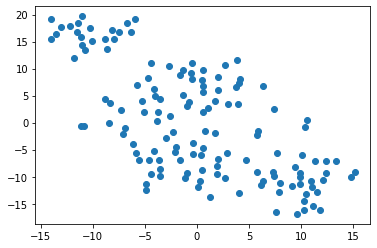

In [73]:
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')


In [75]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#kmeans = KMeans(n_clusters=2, init='k-means++')
#kmeans.fit(data_scaled)

kmeans = KMeans(n_clusters=2)
kmeans.fit(data_2D)

print(kmeans.cluster_centers_) # valeurs des coordonnées centroïdes.

#show_annotated_clustering(data_2D, cntocd, country_names)

[[ 4.38529808 -8.4623832 ]
 [-4.64710692  8.96760011]]


138

Text(0, 0.5, 'Inertia')

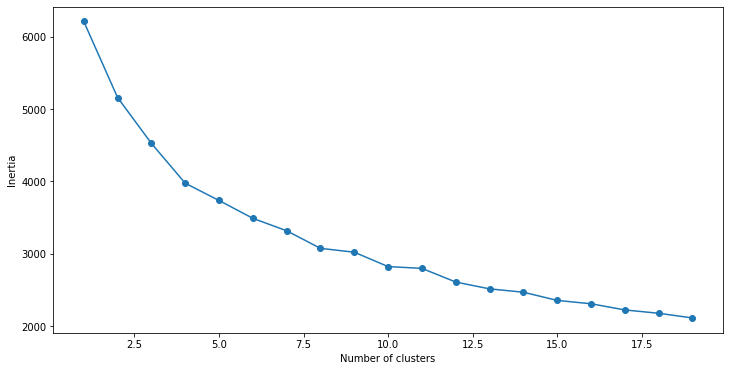

In [7]:
#-Votre deuxième tâche consiste à regrouper les données HDR avec l'algorithme k-means pourk = 2 ... 10 grappes. 
#Choisissez un cluster  (pas assez de grappes, assez de grappes, trop de grappes).puis commenter


SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

[]

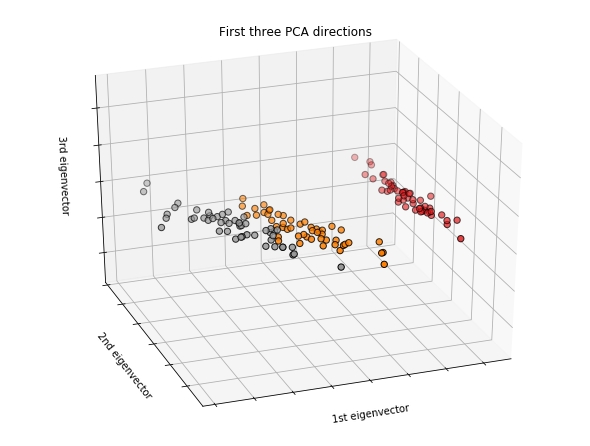

In [25]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA().fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])